In [3]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from acquire import get_zillow_data

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

# Acquire & Summarize
#### 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.
   * **Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may  have a null value for airconditioningtypeid.**
   * Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
   * Only include properties that include a latitude and longitude value.


In [4]:
zillow = get_zillow_data()

In [5]:
zillow.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,parcelid,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,nan,nan,261.00,nan,nan,nan,nan,0,14297519,0.03,...,None,nan,60590630072012.00,None,None,None,None,Single Family Residential,None,None
1,nan,nan,261.00,nan,nan,nan,nan,1,17052889,0.06,...,None,nan,61110010023006.00,None,None,None,None,Single Family Residential,None,None
2,nan,nan,261.00,nan,nan,nan,nan,2,14186244,0.01,...,None,nan,60590218022012.00,None,None,None,None,Single Family Residential,None,None
3,nan,nan,261.00,2.00,nan,nan,nan,3,12177905,-0.10,...,None,nan,60373001001006.00,None,None,None,Central,Single Family Residential,None,None
4,nan,nan,266.00,2.00,nan,nan,1.00,4,10887214,0.01,...,None,nan,60371236012000.00,Central,None,None,Central,Condominium,None,None


In [6]:
#narrow down 
#first peek at all columns
zillow.columns.tolist()

['typeconstructiontypeid',
 'storytypeid',
 'propertylandusetypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'id',
 'parcelid',
 'logerror',
 'transactiondate',
 'parcelid',
 'trans_date',
 'id',
 'parcelid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',

In [7]:
# address duplicates
zillow.columns = ['typeconstructiontypeid',
                  'storytypeid',
                  'propertylandusetypeid',
                  'heatingorsystemtypeid',
                  'buildingclasstypeid',
                  'architecturalstyletypeid',
                  'airconditioningtypeid',
                  'id',
                  'parcelid',
                  'logerror',
                  'transactiondate',
                  'parcelid2',
                  'trans_date',
                  'id2',
                  'parcelid3',
                  'basementsqft',
                  'bathroomcnt',
                  'bedroomcnt',
                  'buildingqualitytypeid',
                  'calculatedbathnbr',
                  'decktypeid',
                  'finishedfloor1squarefeet',
                  'calculatedfinishedsquarefeet',
                  'finishedsquarefeet12',
                  'finishedsquarefeet13',
                  'finishedsquarefeet15',
                  'finishedsquarefeet50',
                  'finishedsquarefeet6',
                  'fips',
                  'fireplacecnt',
                  'fullbathcnt',
                  'garagecarcnt',
                  'garagetotalsqft',
                  'hashottuborspa',
                  'latitude',
                  'longitude',
                  'lotsizesquarefeet',
                  'poolcnt',
                  'poolsizesum',
                  'pooltypeid10',
                  'pooltypeid2',
                  'pooltypeid7',
                  'propertycountylandusecode',
                  'propertyzoningdesc',
                  'rawcensustractandblock',
                  'regionidcity',
                  'regionidcounty',
                  'regionidneighborhood',
                  'regionidzip',
                  'roomcnt',
                  'threequarterbathnbr',
                  'unitcnt',
                  'yardbuildingsqft17',
                  'yardbuildingsqft26',
                  'yearbuilt',
                  'numberofstories',
                  'fireplaceflag',
                  'structuretaxvaluedollarcnt',
                  'taxvaluedollarcnt',
                  'assessmentyear',
                  'landtaxvaluedollarcnt',
                  'taxamount',
                  'taxdelinquencyflag',
                  'taxdelinquencyyear',
                  'censustractandblock',
                  'airconditioningdesc',
                  'architecturalstyledesc',
                  'buildingclassdesc',
                  'heatingorsystemdesc',
                  'propertylandusedesc',
                  'storydesc',
                  'typeconstructiondesc']

In [8]:
#Drop duplicates
zillow = zillow.drop(columns=['parcelid2','parcelid3','id2'])


#### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [9]:
zillow.head(1)

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,parcelid,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,nan,nan,261.00,nan,nan,nan,nan,0,14297519,0.03,...,None,nan,60590630072012.00,None,None,None,None,Single Family Residential,None,None


In [11]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77380 non-null  float64
 3   heatingorsystemtypeid         49439 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   id                            77380 non-null  int64  
 8   parcelid                      77380 non-null  int64  
 9   logerror                      77380 non-null  float64
 10  transactiondate               77380 non-null  object 
 11  trans_date                    77380 non-null  object 
 12  basementsqft                  50 non-null     float64
 13  b

In [12]:
zillow.describe()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,parcelid,logerror,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,222.00,50.00,77380.00,49439.00,15.00,206.00,24953.00,77380.00,77380.00,77380.00,...,77117.00,17560.00,172.00,77268.00,77379.00,77380.00,77378.00,77375.00,2886.00,77136.00
mean,6.04,7.00,261.83,3.92,3.93,7.39,1.81,38848.19,13007149.52,0.02,...,1968.64,1.43,1.00,189315.98,490137.46,2016.00,301096.94,5995.57,14.09,60496735236342.02
std,0.56,0.00,5.14,3.59,0.26,2.73,2.97,22402.14,3481368.13,0.17,...,23.79,0.54,0.00,230088.56,653447.67,0.00,492599.03,7622.89,2.19,1535251869244.56
min,4.00,7.00,31.00,1.00,3.00,2.00,1.00,0.00,10711855.00,-4.66,...,1824.00,1.00,1.00,44.00,1000.00,2016.00,161.00,19.92,3.00,60371011101000.00
25%,6.00,7.00,261.00,2.00,4.00,7.00,1.00,19460.75,11538296.75,-0.02,...,1953.00,1.00,1.00,84265.00,207000.00,2016.00,85504.00,2715.59,14.00,60373109005001.75
50%,6.00,7.00,261.00,2.00,4.00,7.00,1.00,38869.50,12531548.50,0.01,...,1970.00,1.00,1.00,136499.50,358976.00,2016.00,203383.50,4450.72,15.00,60376032003008.00
75%,6.00,7.00,266.00,7.00,4.00,7.00,1.00,58252.25,14211843.75,0.04,...,1987.00,2.00,1.00,218787.50,569003.00,2016.00,366802.25,6927.80,15.00,60590423251008.00
max,13.00,7.00,275.00,24.00,4.00,21.00,13.00,77612.00,167689317.00,5.26,...,2016.00,6.00,1.00,11421790.00,49061236.00,2016.00,48952198.00,586639.30,99.00,483030105084015.00


In [13]:
zillow.shape

(77380, 69)

#### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [15]:
# Obtain the counts of all the nulls and sort
nulls = zillow.isnull().sum().sort_values(ascending=False)
nulls.head()


buildingclasstypeid     77365
buildingclassdesc       77365
finishedsquarefeet13    77339
storytypeid             77330
basementsqft            77330
dtype: int64

In [19]:
#Lower nulls
nulls.tail(30)

lotsizesquarefeet               8239
finishedsquarefeet12            3632
regionidcity                    1471
calculatedbathnbr                609
fullbathcnt                      609
yearbuilt                        263
censustractandblock              244
calculatedfinishedsquarefeet     196
structuretaxvaluedollarcnt       112
regionidzip                       50
taxamount                          5
landtaxvaluedollarcnt              2
taxvaluedollarcnt                  1
transactiondate                    0
propertylandusetypeid              0
id                                 0
parcelid                           0
propertylandusedesc                0
logerror                           0
propertycountylandusecode          0
trans_date                         0
bathroomcnt                        0
bedroomcnt                         0
roomcnt                            0
fips                               0
regionidcounty                     0
rawcensustractandblock             0
l

In [21]:
#Function to identify where the data is missing
def nulls_by_col(df):
    num_missing = zillow.isnull().sum()
    rows = zillow.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [23]:
#Check fucntion 
nulls_by_column = nulls_by_col(zillow)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False, inplace=True)
nulls_by_column.head(15)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77365,1.00
buildingclasstypeid,77365,1.00
finishedsquarefeet13,77339,1.00
basementsqft,77330,1.00
storydesc,77330,1.00
storytypeid,77330,1.00
yardbuildingsqft26,77310,1.00
fireplaceflag,77208,1.00
architecturalstyletypeid,77174,1.00
architecturalstyledesc,77174,1.00


#### 1. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [26]:
def nulls_by_row(zillow):
    num_cols_missing = zillow.isnull().sum(axis=1)
    pct_cols_missing = zillow.isnull().sum(axis=1)/zillow.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing 

null_rows = nulls_by_row(zillow)
null_rows.sort_values(by="pct_cols_missing", ascending=False, inplace=True)
null_rows.head(10)

,num_cols_missing,pct_cols_missing,num_rows
25,48,69.56521739130434,3
24,47,68.11594202898551,3
23,46,66.66666666666666,5
22,45,65.21739130434783,50
21,44,63.76811594202898,78
20,43,62.31884057971014,28
19,42,60.86956521739131,23
18,41,59.42028985507246,29
17,40,57.971014492753625,230
16,39,56.52173913043478,285


In [ ]:
#Takeaways here


# <font color = "darkgreen"> Prepare</font>

#### 1.  Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [27]:
# Filter out single units from propertylandusetype
# 260- Residential General
# 261- Single Family residential
# 262- Rural Residence
# 279- Inferred Single Faily Residential
zillow = zillow[zillow.propertylandusetypeid.isin([260, 261, 262, 279])]

In [28]:
#Filter out 0 bedroom and 0 bathroom
zillow = zillow[(zillow.bedroomcnt > 0) & (zillow.bathroomcnt > 0)]

In [29]:
zillow.shape

(52178, 69)

In [30]:
#unit count
zillow.unitcnt.value_counts()

1.00    33698
2.00       26
4.00        2
3.00        1
Name: unitcnt, dtype: int64

In [31]:
zillow.unitcnt.isnull().sum()

18451

In [33]:
zillow.unitcnt = zillow.unitcnt.fillna(1.0)
zillow.shape

(52178, 69)

In [34]:
(zillow.unitcnt != 1.0).sum()

29

In [35]:
# get rid of other types
zillow = zillow[zillow.unitcnt == 1.0]

In [36]:
zillow.shape

(52149, 69)

#### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).
* The input:
     * A dataframe
     * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
     * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
* The output:
     * The dataframe with the columns and rows dropped as indicated._Be sure to drop the columns prior to the rows in your function._
* __hint:__
     * Look up the dropna documentation.
     * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
     * Make use of inplace, i.e. inplace=True/False.

In [38]:

def handle_missing_values(zillow, prop_required_column = .60, prop_required_row = .60):
    threshold = int(round(prop_required_column*len(zillow.index),0))
    zillow.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(zillow.columns),0))
    zillow.dropna(axis=0, thresh=threshold, inplace=True)
    return zillow

In [39]:
zillow = handle_missing_values(zillow)

In [41]:
#drop redundant id columns
zillow = zillow.drop(columns=["propertylandusetypeid", "heatingorsystemtypeid"])

In [43]:
zillow.isnull().sum().sort_values(ascending=False)

buildingqualitytypeid           18537
propertyzoningdesc              18476
heatingorsystemdesc             18334
regionidcity                     1028
lotsizesquarefeet                 350
finishedsquarefeet12              166
censustractandblock               109
structuretaxvaluedollarcnt         69
yearbuilt                          40
regionidzip                        23
fullbathcnt                        16
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
taxamount                           4
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
transactiondate                     0
trans_date                          0
logerror                            0
bathroomcnt                         0
parcelid                            0
bedroomcnt                          0
propertylandusedesc                 0
propertycountylandusecode           0
fips                                0
latitude                            0
longitude   

In [44]:
zillow.heatingorsystemdesc.isnull().sum()

18334

In [45]:
zillow.heatingorsystemdesc.value_counts(dropna=False)

Central       20676
NaN           18334
Floor/Wall    12505
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [46]:
zillow.heatingorsystemdesc = zillow.heatingorsystemdesc.fillna("None")

In [47]:
zillow = zillow.drop(columns=["propertyzoningdesc"])

In [48]:
zillow = zillow.drop(columns=["calculatedbathnbr"])

In [50]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(zillow, train_size=.8, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

In [53]:
#Categorical columns
cols = [
    "buildingqualitytypeid",
    "regionidcity",
    "regionidzip",
    "yearbuilt",
    "regionidcity",
    "censustractandblock"
]

for col in cols:
    mode = int(train[col].mode()) 
    train[col].fillna(value=mode, inplace=True)
    validate[col].fillna(value=mode, inplace=True)
    test[col].fillna(value=mode, inplace=True)

In [52]:
train.isnull().sum().sort_values(ascending=False).head(10)

lotsizesquarefeet               222
finishedsquarefeet12             89
structuretaxvaluedollarcnt       39
fullbathcnt                      10
calculatedfinishedsquarefeet      5
taxamount                         4
buildingqualitytypeid             0
latitude                          0
fips                              0
propertylandusedesc               0
dtype: int64

In [54]:
#Continuous columns
cols = [
    "structuretaxvaluedollarcnt",
    "taxamount",
    "taxvaluedollarcnt",
    "landtaxvaluedollarcnt",
    "structuretaxvaluedollarcnt",
    "finishedsquarefeet12",
    "calculatedfinishedsquarefeet",
    "fullbathcnt",
    "lotsizesquarefeet"
]


for col in cols:
    median = train[col].median()
    train[col].fillna(median, inplace=True)
    validate[col].fillna(median, inplace=True)
    test[col].fillna(median, inplace=True)

In [55]:
train.isnull().sum().sort_values(ascending=False)

propertylandusedesc             0
lotsizesquarefeet               0
parcelid                        0
logerror                        0
transactiondate                 0
trans_date                      0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
propertycountylandusecode       0
heatingorsystemdesc             0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractand

In [56]:
train.isnull().sum().sort_values(ascending=False).sum()

0

In [ ]:
# No more nulls

#### 3. Decide how to handle the remaining missing values:

* Fill with constant value.
* Impute with mean, median, mode.
* Drop row/column

# **wrangle_zillow.py**
Functions of the work above needed to acquire and prepare a new sample of data.

# Mall Customers
__notebook__
1. Acquire data from mall_customers.customers in mysql database.
2. Summarize data (include distributions and descriptive statistics).
3. Detect outliers using IQR.
4. Split data (train, validate, and test split).
5. Encode categorical columns using a one hot encoder (pd.get_dummies).
6. Handles missing values.
7. Scaling


# wrangle_mall.py

1. Acquire data from mall_customers.customers in mysql database.
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
4. Missing values
5. Scaling

In [66]:
# Summarize data (include distributions and descriptive statistics).

In [60]:

import os

# acquire
from env import host, user, password


os.path.isfile('mallcustomers_df.csv')


# Create helper function to get the necessary connection url.
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

    
    

# Use the above helper function and a sql query in a single function.
def new_mall_data():
    '''
    This function reads data from the Codeup db into a df.
    '''
    mall_customers_sql = "SELECT * \
                  FROM customers;;" \
    
    
    return pd.read_sql(mall_customers_sql, get_connection('mall_customers'))


In [61]:
df = new_mall_data()

In [62]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [65]:
def missing_zero_values_table(df):
    
    '''This function will look at any data set and report back on zeros and nulls for every column while also giving percentages of total values
        and also the data types. The message prints out the shape of the data frame and also tells you how many columns have nulls '''
    
    
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " +  str((mz_table['null_count'] != 0).sum()) +
          " columns that have NULL values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)

    return mz_table

missing_zero_values_table(df)

Your selected dataframe has 5 columns and 200 Rows.
There are 0 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
customer_id,0,0,0.00,0,0.00,int64
gender,0,0,0.00,0,0.00,object
age,0,0,0.00,0,0.00,int64
annual_income,0,0,0.00,0,0.00,int64
spending_score,0,0,0.00,0,0.00,int64


In [68]:
# Detect outliers using IQR
q1, q3 = df.annual_income.quantile([.25, .75])

iqr = q3 - q1

upperbound = q3 + 3.0 * iqr
lowerbound = q1 - 3.0 * iqr

print(f'The upper bound quartile is {upperbound} while our lower bound quartile is {lowerbound}. These outliers will be addressed in prep')

The upper bound quartile is 187.5 while our lower bound quartile is -68.0. These outliers will be addressed in prep


In [69]:
q1, q3 = df.spending_score.quantile([.25, .75])

iqr = q3 - q1

upperbound = q3 + 3.0 * iqr
lowerbound = q1 - 3.0 * iqr

print(f'The upper bound quartile is {upperbound} while our lower bound quartile is {lowerbound}. These outliers will be addressed in prep')

The upper bound quartile is 187.75 while our lower bound quartile is -80.0. These outliers will be addressed in prep


<AxesSubplot:xlabel='spending_score'>

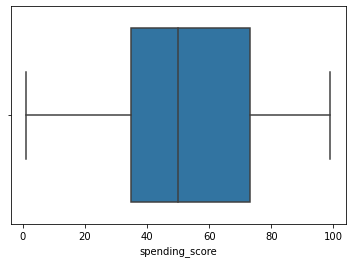

In [70]:
sns.boxplot(data = df, x = 'spending_score')

<AxesSubplot:xlabel='annual_income'>

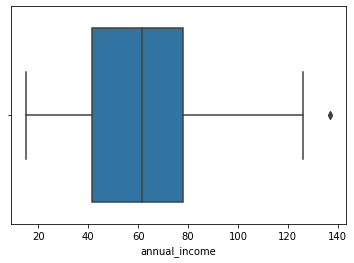

In [71]:
sns.boxplot(data = df, x = 'annual_income')

<AxesSubplot:xlabel='age'>

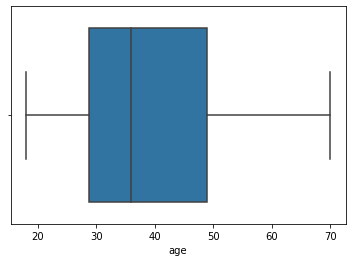

In [72]:
sns.boxplot(data = df, x = 'age')

In [ ]:
#Takeaways


In [ ]:
#Split data

In [73]:
def split_data(df):
    '''
    split our data,
    takes in a pandas dataframe
    returns: three pandas dataframes, train, test, and validate
    '''
    train_val, test = train_test_split(df, train_size=0.8, random_state=123)
    train, validate = train_test_split(train_val, train_size=0.7, random_state=123)
    
    
    return train, validate, test

In [74]:
train, validate, test = split_data(df)

In [75]:
train.shape, validate.shape, test.shape

((112, 5), (48, 5), (40, 5))

In [76]:
# Encode categorical columns using a one hot encoder (pd.get_dummies).
# Handles missing values.
# Scaling
# wrangle_mall.py
# Acquire data from mall_customers.customers in mysql database.
# Split the data into train, validate, and split
# One-hot-encoding (pd.get_dummies)
# Missing values
# Scaling